In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
from multiprocessing import Process, Pool, current_process
%matplotlib inline

In [2]:
def noise_1(e, n, N):
    return e*math.sin(4*math.pi*n/N)

In [3]:
def noise_2(e, n, N):
    return e*math.sin(4*math.pi*n/N)*math.sin(6*math.pi*n/N)

In [4]:
def game_a(capital, games, p_1, n, N, e = 0.005):
    #coin 1
    capital_list = [capital] + [0 for _ in range(games)]
    for i in range(1, games+1):
        curr_capital = capital_list[i-1]
        if n == -1:
            p_1_noise = p_1 - noise_1(e, i, N)
        else:
            p_1_noise = p_1 - noise_1(e, n, N)
        u = rd.uniform(0,1)
        if u <= p_1_noise:
            capital_list[i] = curr_capital + 1
        else:
            capital_list[i] = curr_capital - 1
    return capital_list

In [5]:
def game_b(capital, games, p_2, p_3, n, N, e = 0.005, M = 3):
    capital_list = [capital] + [0 for _ in range(games)]
    for i in range(1, games+1):
        curr_capital = capital_list[i-1]
        if curr_capital % M == 0:
            #play coin 2
            if n == -1:
                p_2_noise = p_2 - noise_1(e, i, N)
            else:
                p_2_noise = p_2 - noise_1(e, n, N)
            u = rd.uniform(0,1)
            if u <= p_2_noise:
                capital_list[i] = curr_capital + 1
            else:
                capital_list[i] = curr_capital - 1
        else:
            #play coin 3
            if n == -1:
                p_3_noise = p_3 - noise_1(e, i, N)
            else:
                p_3_noise = p_3 - noise_1(e, n, N)
            u = rd.uniform(0,1)
            if u <= p_3_noise:
                capital_list[i] = curr_capital + 1
            else:
                capital_list[i] = curr_capital - 1
    return capital_list

In [6]:
def sim_game_a(p_1, games = 100, trials = 500000):
    capital_list = np.zeros((trials, games+1))
    processes = []
    for j in tqdm(range(trials)):       
        capital_list[j, :] = np.array(game_a(0, games, p_1, -1, games))
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [7]:
def sim_game_b(p_2, p_3, games = 100, trials = 500000):
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        capital_list[j, :] = np.array(game_b(0, games, p_2, p_3, -1, games))
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [8]:
def sim_rand_a_b(p_1, p_2, p_3, games = 100, trials = 500000):
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        for k in range(1,games+1):
            curr_cap = capital_list[j, k-1]
            choice = rd.choice(['a', 'b'])
            if choice == 'a':
                #play game a
                curr_capital = game_a(curr_cap, 1, p_1, k, games)[-1]
                capital_list[j, k] = curr_capital
            else:
                #play game b
                curr_capital = game_b(curr_cap, 1, p_2, p_3, k, games)[-1]
                capital_list[j, k] = curr_capital
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [9]:
def sim_AABB(games = 100, trials = 500000):
    sequence = 'AABB'*25
    capital_list = np.zeros((trials, games+1))
    for j in tqdm(range(trials)):
        for k in range(1, games+1):
            curr_cap = capital_list[j, k-1]
            if sequence[k-1] == 'A':
                curr_capital = game_a(curr_cap, 1, p_1, k, games)[-1]
                capital_list[j, k] = curr_capital
            else:
                curr_capital = game_b(curr_cap, 1, p_2, p_3, k, games)[-1]
                capital_list[j, k] = curr_capital
    mean_capital_list = np.mean(capital_list, axis=0)
    return mean_capital_list

In [10]:
x_axis = np.arange(0,101)

In [ ]:
for p_1 in np.arange(0.500, .490, -0.001):
    game_a_results = np.array(sim_game_a(p_1))
    plt.plot(x_axis, game_a_results, label = "p1': " + str(p_1))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Capital')
plt.title('Game A only')
plt.show()

In [13]:
p_2 = np.arange(0.100, .090, -0.001)
p_3 = np.arange(0.750, .740, -0.001)

for p_2, p_3 in zip(p_2, p_3):
    game_b_results = np.array(sim_game_b(p_2, p_3))
    plt.plot(x_axis, game_b_results, label = "p2': " + str(p_2) + ", p3': " + str(p_3))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Capital')
plt.title('Game B only')
plt.show()

 65%|██████▌   | 325734/500000 [01:02<00:33, 5227.56it/s]


KeyboardInterrupt: 

100%|██████████| 500000/500000 [01:29<00:00, 5587.09it/s]


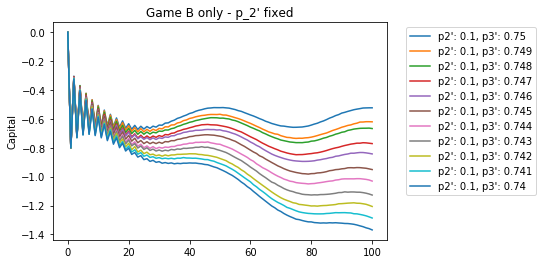

In [12]:
p_2 = [0.100] *11
p_3 = np.arange(0.750, .740, -0.001)

for p_2, p_3 in zip(p_2, p_3):
    game_b_results = np.array(sim_game_b(p_2, p_3))
    plt.plot(x_axis, game_b_results, label = "p2': " + str(p_2) + ", p3': " + str(p_3))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Capital')
plt.title("Game B only - p_2' fixed")
plt.show()

100%|██████████| 500000/500000 [01:30<00:00, 5511.88it/s]


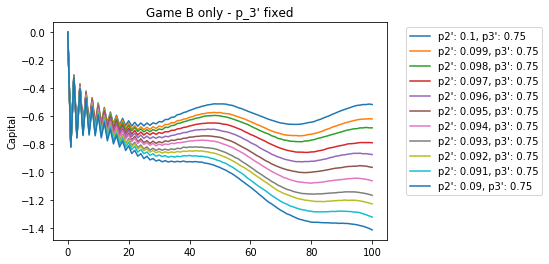

In [11]:
p_2 = np.arange(0.100, .090, -0.001)
p_3 = [.750] * 11

for p_2, p_3 in zip(p_2, p_3):
    game_b_results = np.array(sim_game_b(p_2, p_3))
    plt.plot(x_axis, game_b_results, label = "p2': " + str(p_2) + ", p3': " + str(p_3))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Capital')
plt.title("Game B only - p_3' fixed")
plt.show()

In [ ]:
p_1 = np.arange(0.500, .490, -0.001)
p_2 = np.arange(0.100, .090, -0.001)
p_3 = np.arange(0.750, .740, -0.001)

for p_1, p_2, p_3 in zip(p_1, p_2, p_3):
    game_rand_results = np.array(sim_rand_a_b(p_1, p_2, p_3))
    plt.plot(x_axis, game_rand_results, label = "p1': " + str(p_1) + ", p2': " + str(p_2) + ", p3': " + str(p_3))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylabel('Capital')
plt.title("Random Combination")
plt.show()

In [ ]:
p_1 = np.arange(0.500, .490, -0.001)
p_2 = np.arange(0.100, .090, -0.001)
p_3 = np.arange(0.750, .740, -0.001)

for p_1, p_2, p_3 in zip(p_1, p_2, p_3):
    game_ABAB_results = np.array(sim_AABB(p_1, p_2, p_3))
    plt.plot(x_axis, game_ABAB_results, label = "p1': " + str(p_1) + "p2': " + str(p_2) + "p3': " + str(p_3))

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title("Periodic Combination")
plt.ylabel('Capital')
plt.show()